# Prelimiaries

In [5]:
#Load ethanstools from github
devtools::install_github("connoryen/ethanstools", force = TRUE)
library(ethanstools)

withr (2.5.0 -> 2.5.1) [CRAN]


Installing 1 packages: withr

Installing package into 'C:/Users/Ethan/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)




  There is a binary version available but the source version is later:
      binary source needs_compilation
withr  2.5.0  2.5.1             FALSE



installing the source package 'withr'




── R CMD build ─────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file 'C:\Users\Ethan\AppData\Local\Temp\Rtmpm65Frc\remotes24146b5b7aeb\connoryen-ethanstools-2f54eec/DESCRIPTION'
─  preparing 'ethanstools':
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted 'LazyData' from DESCRIPTION
─  building 'ethanstools_0.1.0.tar.gz'
   


Warning message:
"package 'ethanstools' is in use and will not be installed"


# Functions

## `pgram()`

Consider a series $Y_t = s_t + X_t$ where $s_t$ is a deterministic seasonal effect and $X_t$ is stationary. If we are able to model seasonality, our model residuals, $Y_t - s_t$ should look stationary. 

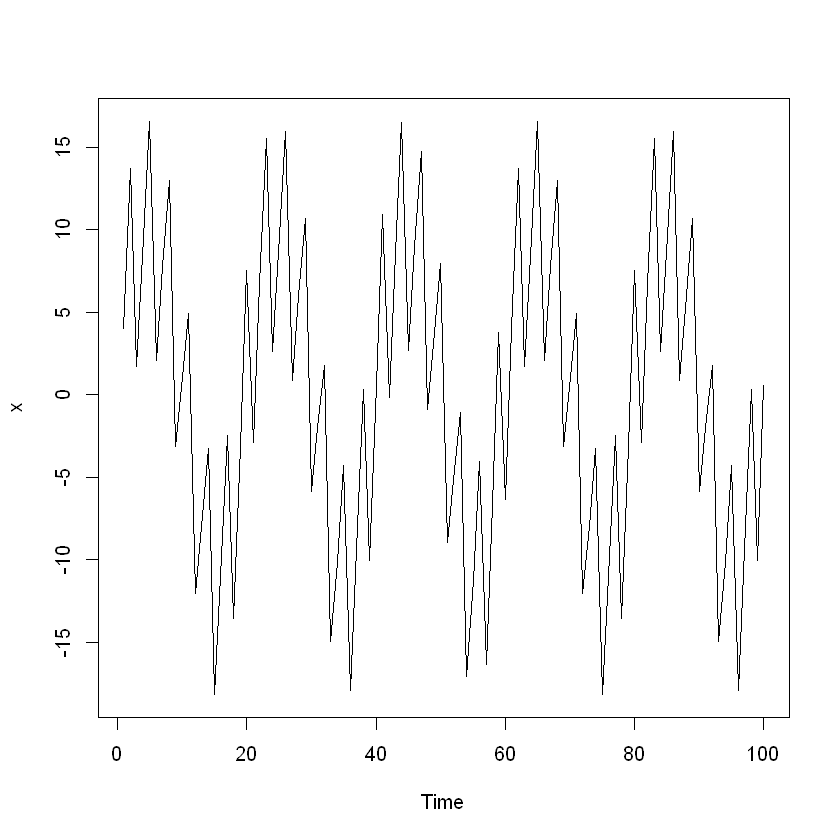

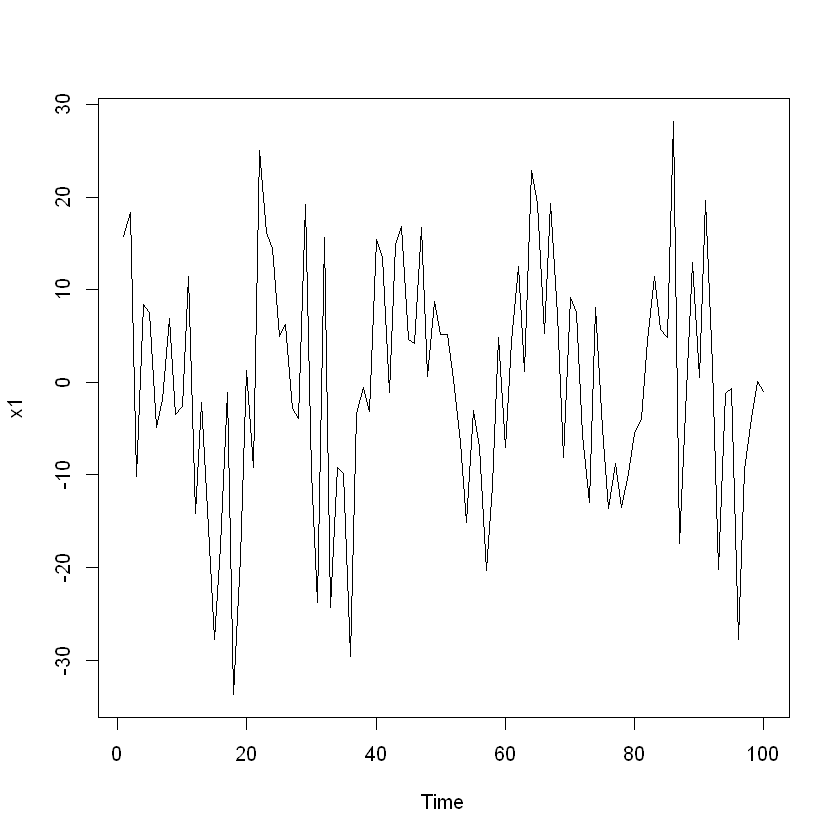

In [42]:
set.seed(03192000)
n = 100
t = 0:(n-1)
f1 = 0.05
f2 = 0.1
f3 = 1/3

x = 10*sin(2*pi*f1*t) + 3*cos(2*pi*f1*t) + cos(2*pi*f2*t) + 8*sin(2*pi*f3*t)
x1 = x + rnorm(t, sd = 8)
plot.ts(x); plot.ts(x1)

We assume $s_t$ is the sum of a finite set of sinusoids, where a sinusoid is defined as:
$$ \{g(t) = R\ \text{cos}(2\pi ft + \Phi) \ : \ R\in\mathbb{R}_+, f\in\mathbb{R}_+, \Phi\in [0,\ 2\pi /f]\}.$$
Now, with $A = R\ \text{cos}(\Phi)$ and $B = -R\ \text{sin}(\Phi)$, we can rewrite the set of *sinusoids* as:
$$ \{g(t) = A\ \text{cos}(2\pi ft) + B\ \text{sin}(2\pi ft) \ : \ A,B\in\mathbb{R}, f\in\mathbb{R}_+\}.$$
Thus, if we know the appropriate frequencies $f$, we can find coefficients $A$ and $B$ through linear modelling. This is where we use the periodogram. For real valued data $x_0,...,x_{n-1}$ with DFT $b_0, ..., b_{n-1}$, the perioogram is defined as:
$$I(j/n) = \frac{|b_j|^2}{n} \quad \text{for} \ j=1,...,\left\lfloor{\frac{n}{2}}\right\rfloor$$

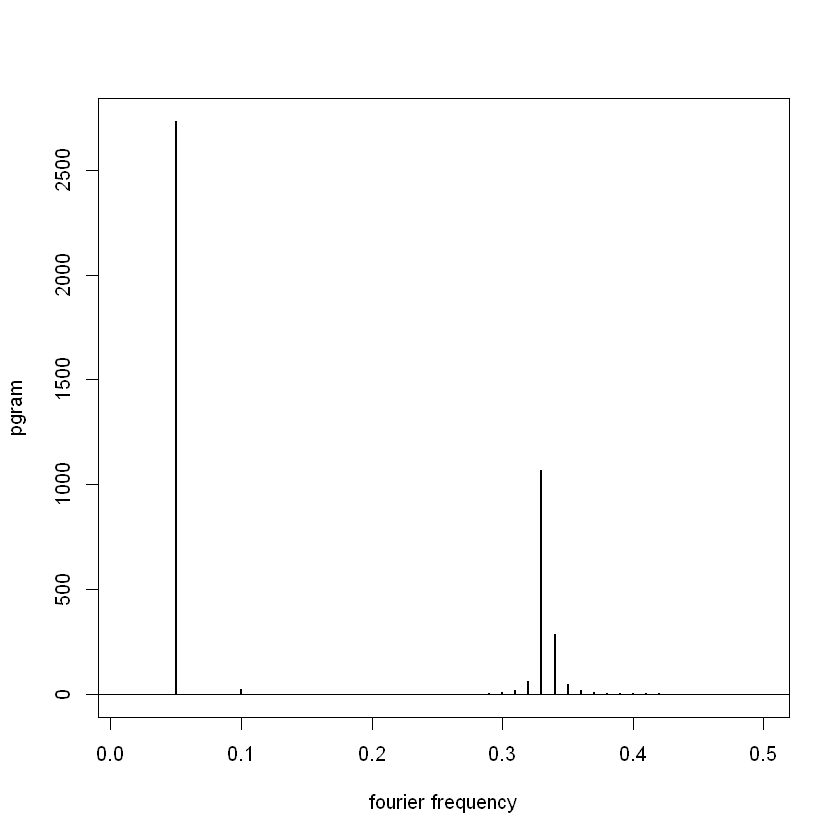

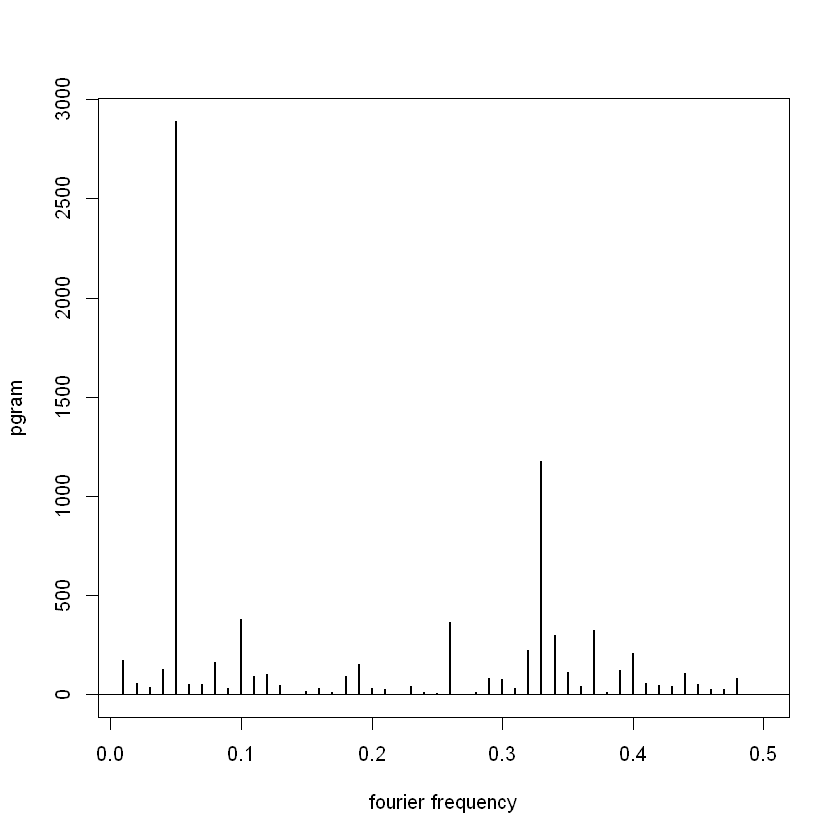

In [43]:
x_pgram <- pgram(x)
x1_pgram <- pgram(x1)

## `sarima.compare()`

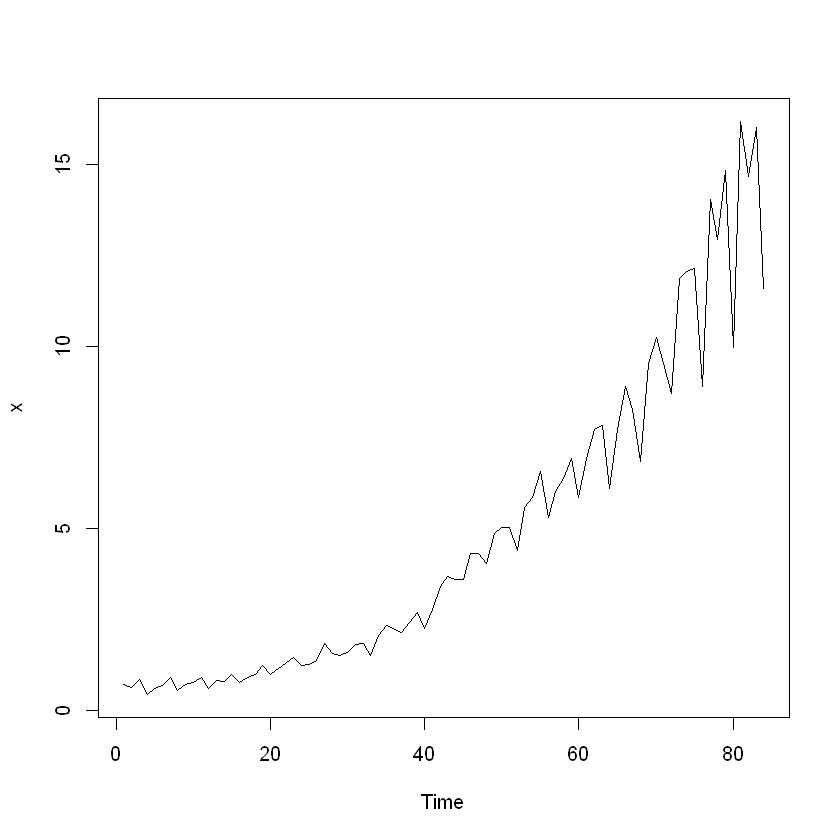

In [2]:
x <- JohnsonJohnson  # get test data
x <- as.vector(x)  # convert out of time series form
plot.ts(x)

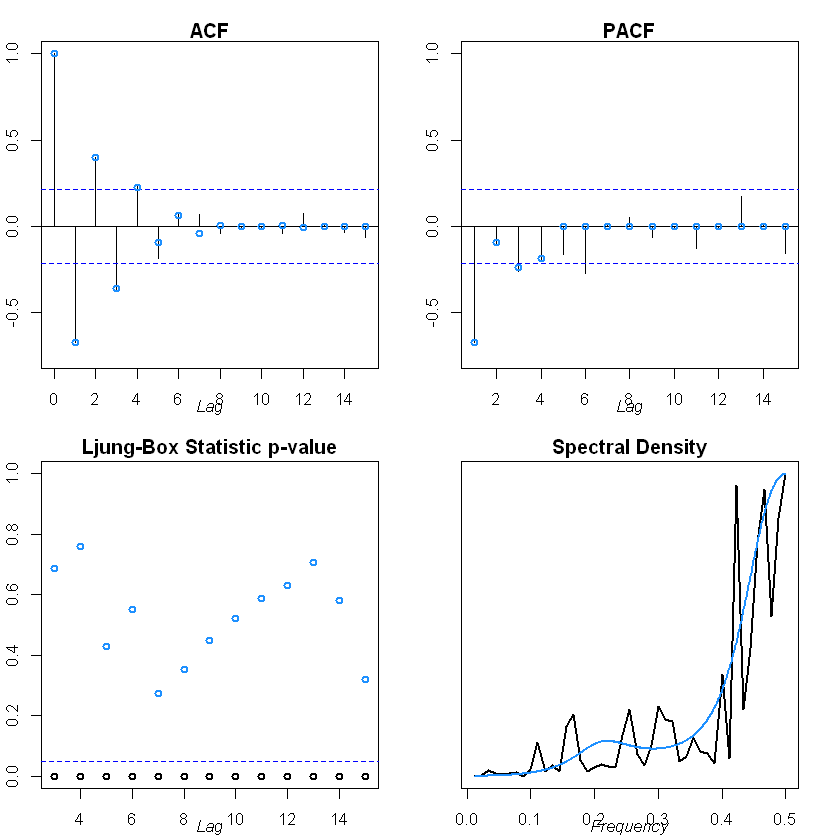

In [4]:
sarima.compare1(x, c(p=4,d=1,q=0, P=0,D=1,Q=0,S=4), 
                ref = c(p=0,d=1,q=0, P=0,D=1,Q=0,S=4))

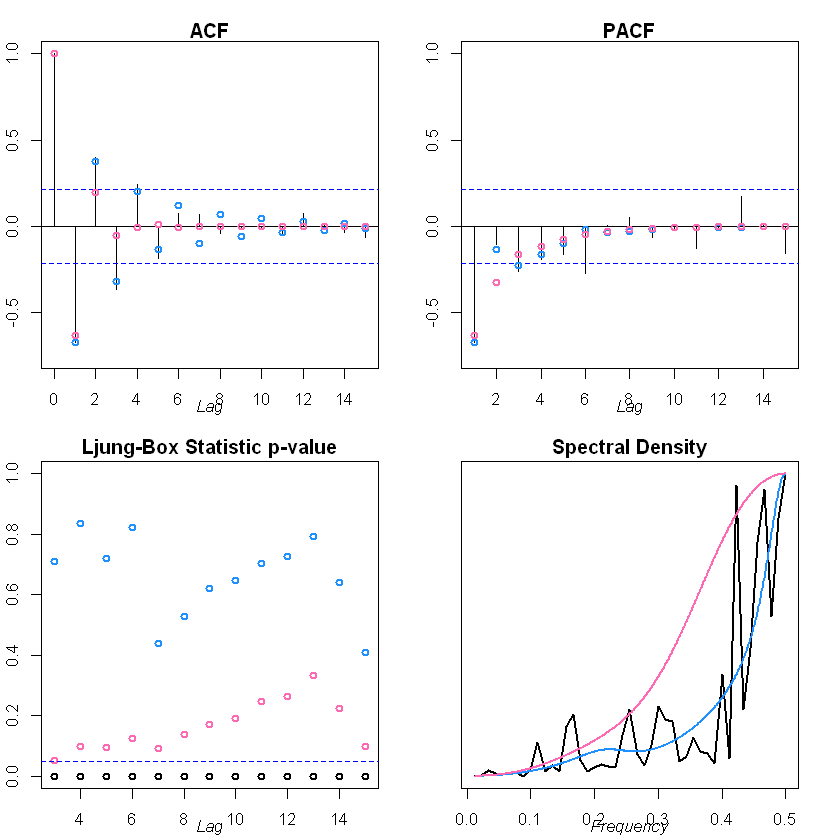

In [5]:
models <- list()
models[['model1']] <- c(p=4,d=1,q=0, P=0,D=1,Q=1,S=4)
models[['model2']] <- c(p=1,d=1,q=1, P=0,D=1,Q=1,S=4)

sarima.compare(x, models, ref = c(p=0,d=1,q=0, P=0,D=1,Q=0,S=4))